In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("./train.csv")

In [3]:
data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [4]:
data['income'] = (data['income'] == '>50K').astype(int)

In [7]:
data.groupby(['sex', 'income'])['income'].count()

sex     income
Female  0          7614
        1           953
Male    0         12130
        1          5352
Name: income, dtype: int64

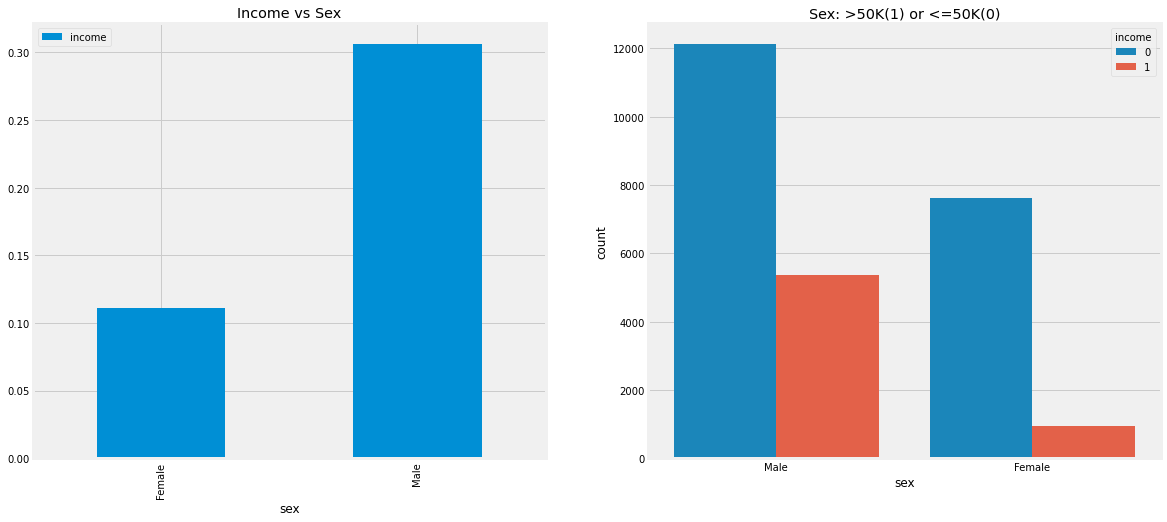

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['sex', 'income']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Income vs Sex")
sns.countplot('sex', hue='income', data=data, ax=ax[1])
ax[1].set_title("Sex: >50K(1) or <=50K(0)")
plt.show()

education_num -> Ordinal Feature

In [17]:
pd.crosstab(data.education_num,data.income,margins=True).style.background_gradient(cmap='summer_r')

income,0,1,All
education_num,,,
1,40,0,40
2,129,5,134
3,252,13,265
4,476,29,505
5,396,22,418
6,678,53,731
7,867,55,922
8,333,26,359
9,7096,1337,8433


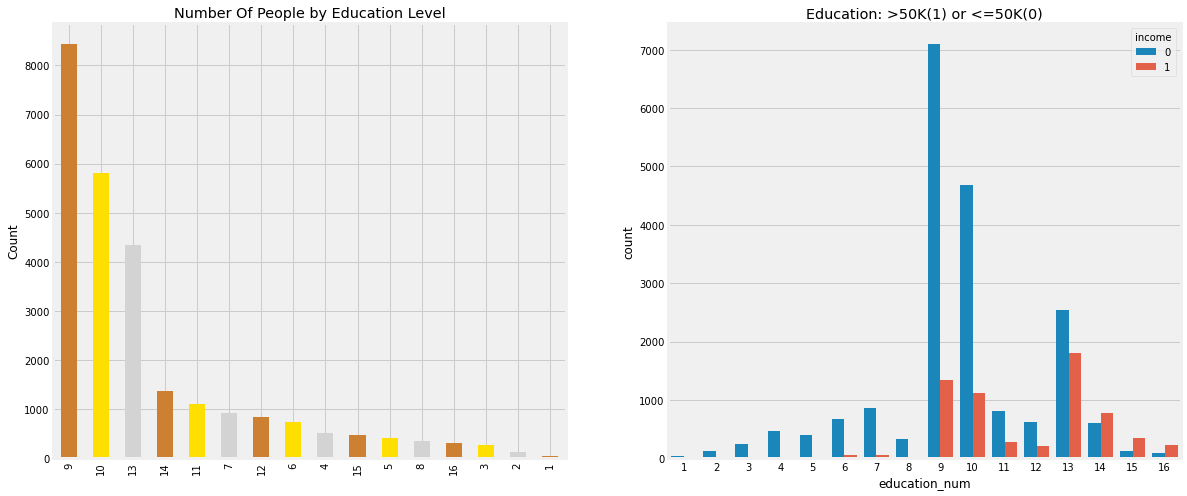

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['education_num'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of People by Education Level')
ax[0].set_ylabel('Count')
sns.countplot('education_num', hue='income', data=data, ax=ax[1])
ax[1].set_title('Education: >50K(1) or <=50K(0)')
plt.show()

In [21]:
pd.crosstab([data.sex, data.income], data.education_num, margins=True).style.background_gradient(cmap='summer_r')

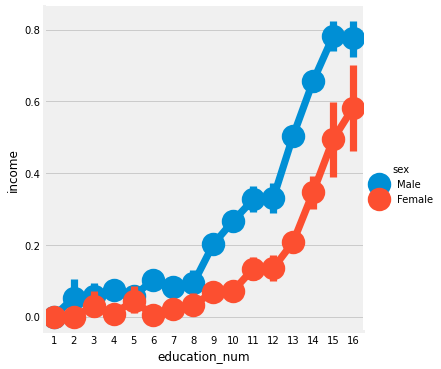

In [34]:
sns.factorplot('education_num', 'income', hue='sex', data=data)
plt.show()

Age -> Continuous Feature

In [30]:
print('Oldest Passenger was of:',data['age'].max(),'Years')
print('Youngest Passenger was of:',data['age'].min(),'Years')
print('Average Age on the People:',data['age'].mean(),'Years')

Oldest Passenger was of: 90 Years
Youngest Passenger was of: 17 Years
Average Age on the People: 38.56923490345119 Years


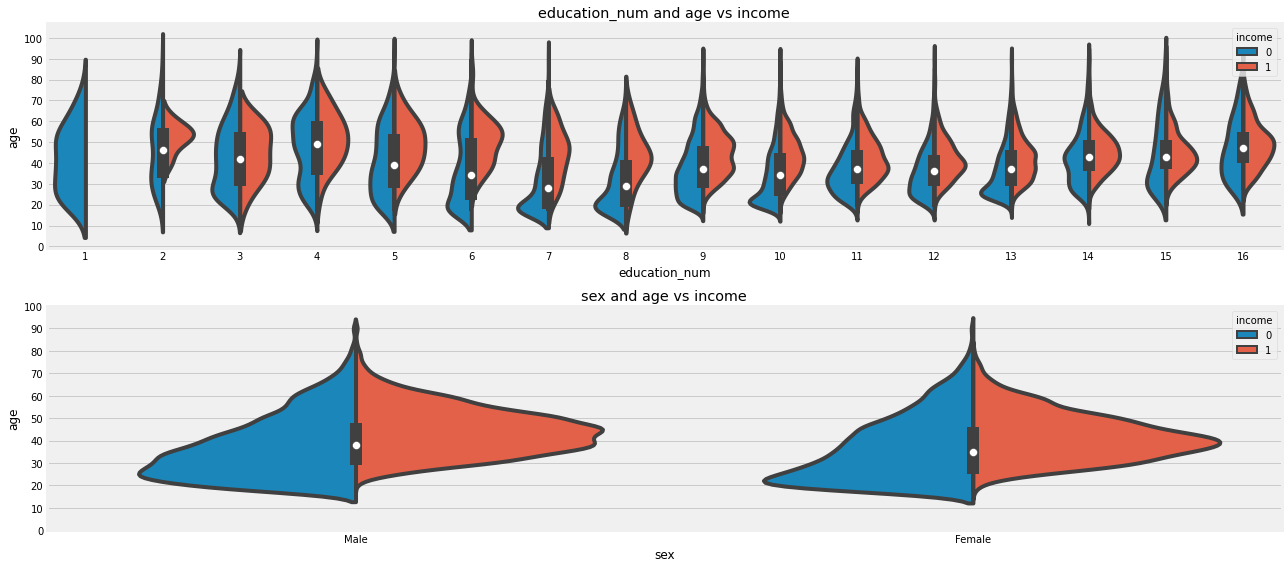

In [40]:
f, ax = plt.subplots(2,1, figsize=(18, 8))
sns.violinplot('education_num', 'age', hue='income', data=data, split=True, ax=ax[0])
ax[0].set_title('education_num and age vs income')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('sex', 'age', hue='income', data=data, split=True, ax=ax[1])
ax[1].set_title('sex and age vs income')
ax[1].set_yticks(range(0,110,10))
f.tight_layout()
plt.show()

In [42]:
import missingno as msno

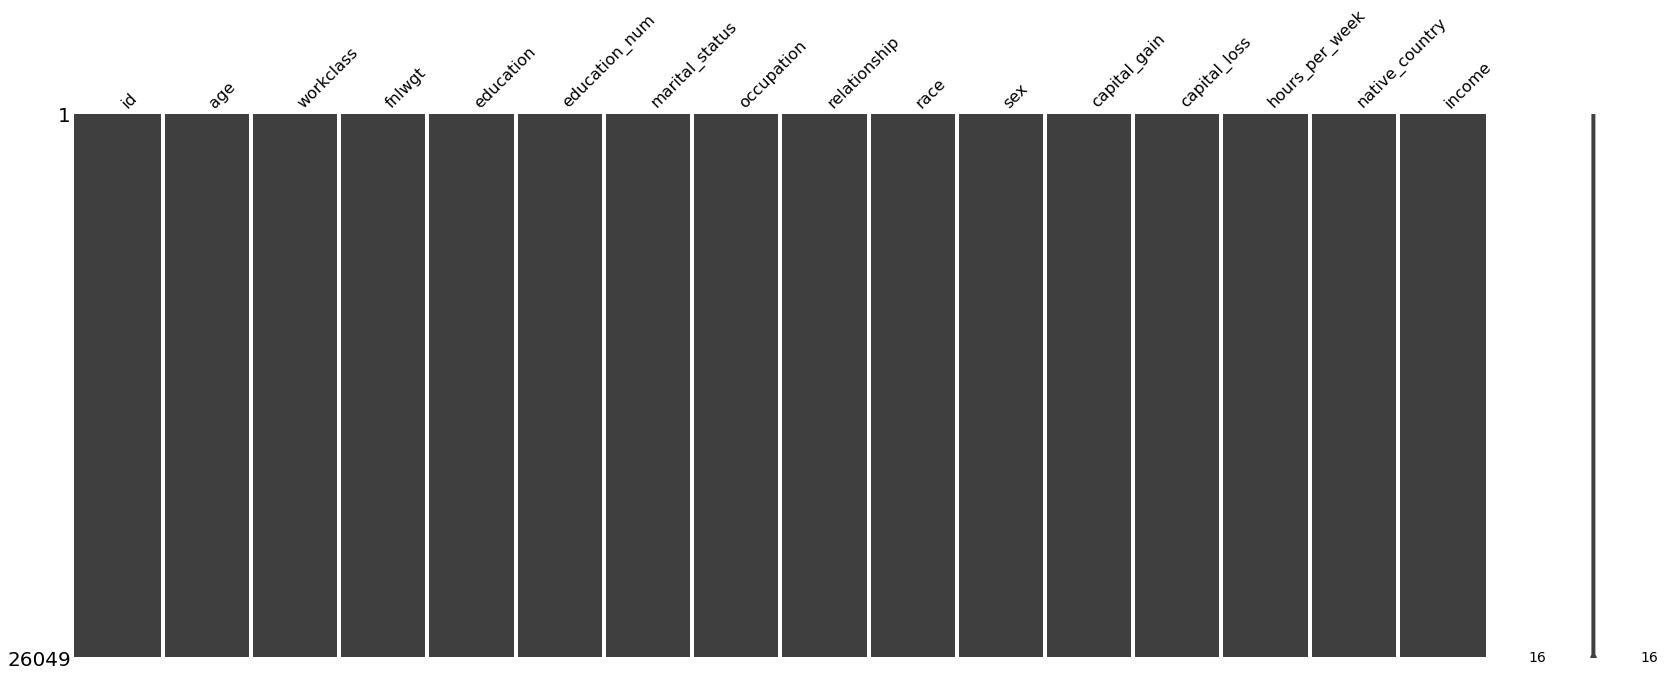

In [46]:
msno.matrix(data)

In [48]:
data.isnull().any()

id                False
age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

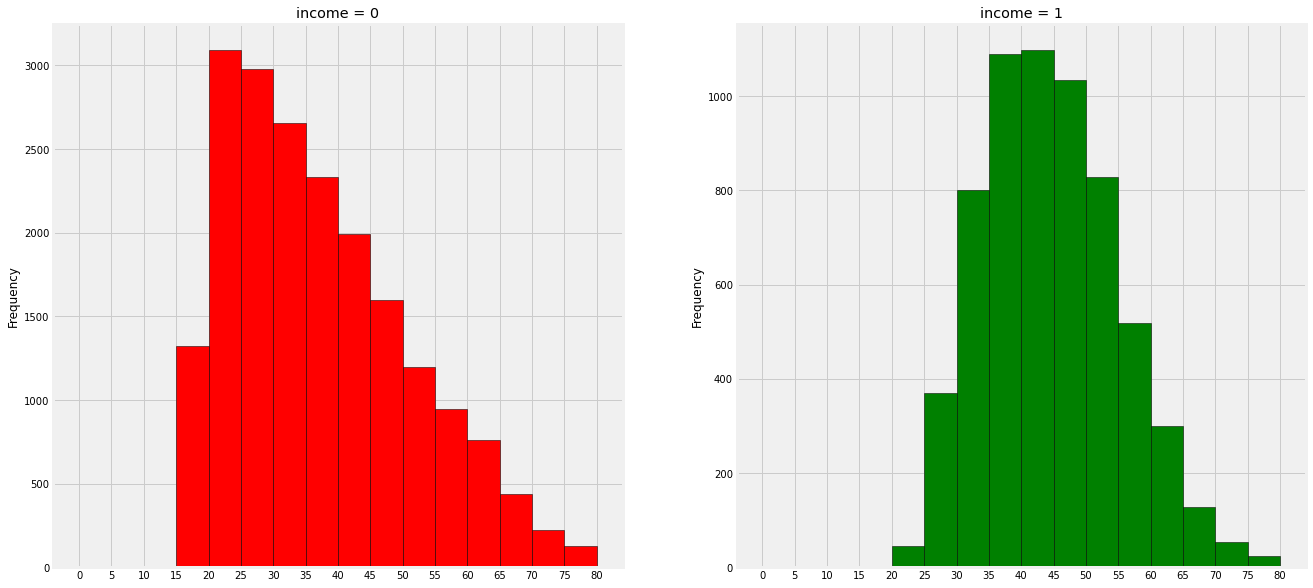

In [69]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].set_title('income = 0')
x1 = list(range(0,85,5))
data[data['income']==0].age.plot.hist(ax=ax[0],bins=x1, edgecolor='black',color='red') # data[data['income']==0].age.plot.hist(ax=ax[0],bins=20, edgecolor='black',color='red')
ax[0].set_xticks(x1)
ax[1].set_title('income = 1')
x2 = list(range(0,85,5))
data[data['income']==1].age.plot.hist(ax=ax[1], bins=x2, edgecolor='black', color='green')
ax[1].set_xticks(x2)
plt.show()

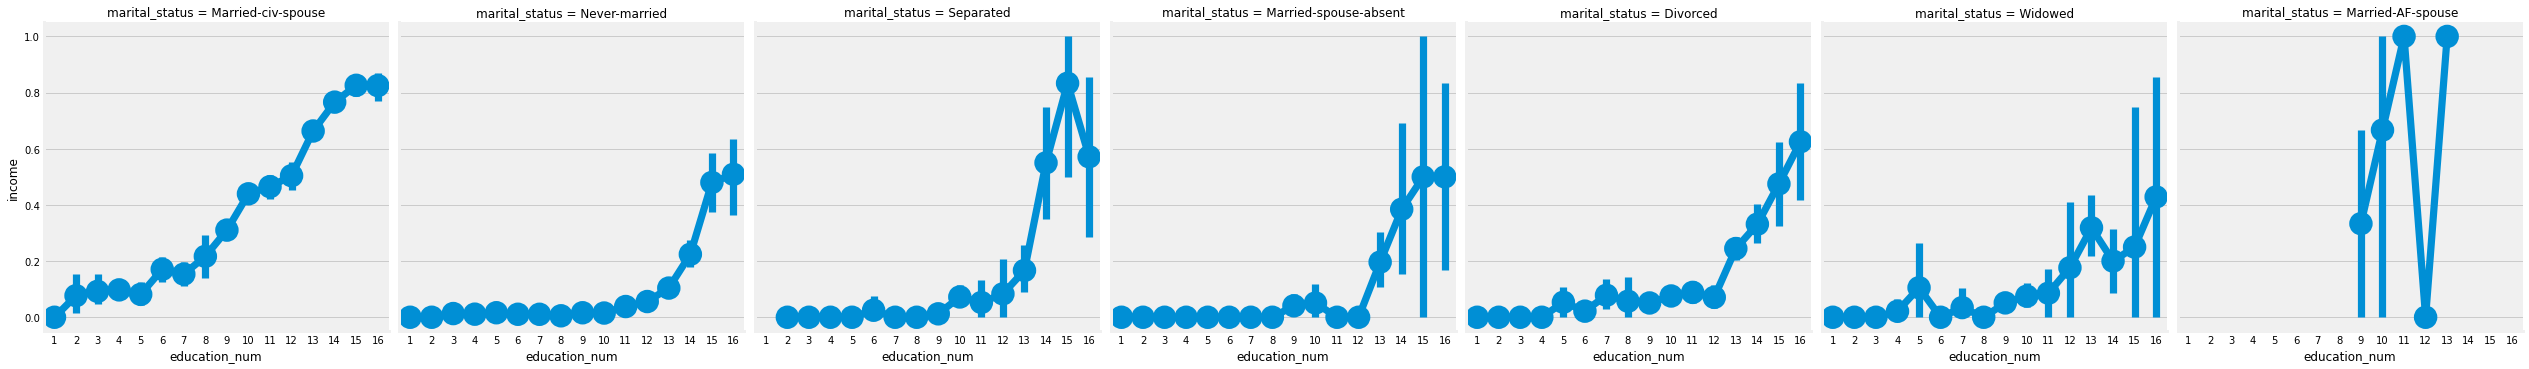

In [85]:
sns.factorplot('education_num', 'income', col='marital_status', data=data)
plt.show()

In [87]:
pd.crosstab([data.sex, data.income],[data.occupation, data.education_num],margins=True).style.background_gradient(cmap='summer_r')

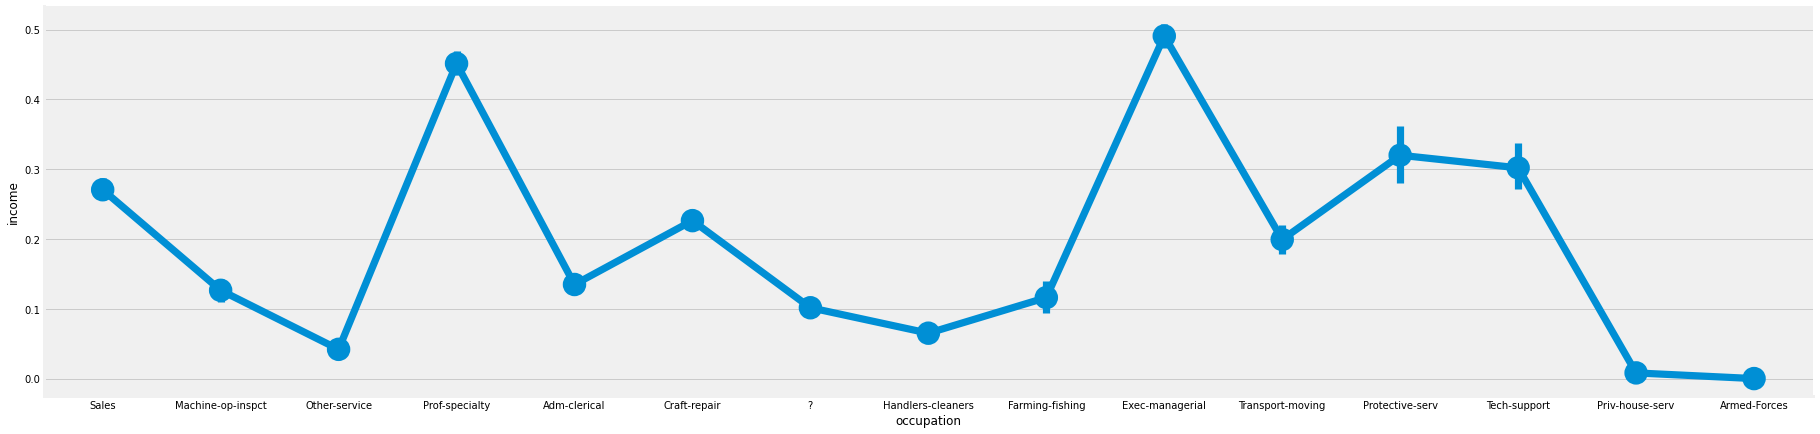

In [91]:
sns.factorplot('occupation','income',data=data)
fig=plt.gcf()
fig.set_size_inches(30,6)
plt.show()